In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [179]:
data = pd.read_excel("World_development_mesurement.xlsx")
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

#### Count of null values and percentage of that in each features.

In [181]:
data.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [182]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(i, "-->", data[i].isnull().sum() , "-->", int(np.round(data[i].isnull().sum()/len(data),2)*100),"%")

Birth Rate --> 119 --> 4 %
Business Tax Rate --> 1281 --> 47 %
CO2 Emissions --> 579 --> 21 %
Days to Start Business --> 986 --> 36 %
Ease of Business --> 2519 --> 93 %
Energy Usage --> 919 --> 34 %
GDP --> 210 --> 8 %
Health Exp % GDP --> 309 --> 11 %
Health Exp/Capita --> 309 --> 11 %
Hours to do Tax --> 1288 --> 48 %
Infant Mortality Rate --> 260 --> 10 %
Internet Usage --> 173 --> 6 %
Lending Interest --> 824 --> 30 %
Life Expectancy Female --> 136 --> 5 %
Life Expectancy Male --> 136 --> 5 %
Mobile Phone Usage --> 167 --> 6 %
Population 0-14 --> 220 --> 8 %
Population 15-64 --> 220 --> 8 %
Population 65+ --> 220 --> 8 %
Population Urban --> 26 --> 1 %
Tourism Inbound --> 368 --> 14 %
Tourism Outbound --> 471 --> 17 %


#### Droping columns with high null percentage.

In [183]:
data.drop(["Ease of Business","Hours to do Tax","Business Tax Rate","Days to Start Business"],inplace=True,axis=1)

In [184]:
data2 = data.drop(["Energy Usage"],axis=1)

#### Dropping null values.

In [185]:
data3 = data2.copy(deep=True)
data3 = data3.dropna()

In [186]:
data3.isnull().sum()

Birth Rate                0
CO2 Emissions             0
Country                   0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

#### Checking unique values and count of unique values in features.

In [187]:
for i in data3.columns:
     print(i ,"-->",data3[i].unique())

Birth Rate --> [0.02  0.05  0.027 0.042 0.041 0.039 0.051 0.025 0.04  0.044 0.034 0.022
 0.045 0.017 0.032 0.043 0.024 0.033 0.013 0.015 0.014 0.012 0.026 0.009
 0.031 0.023 0.019 0.03  0.018 0.011 0.01  0.008 0.021 0.035 0.036 0.029
 0.037 0.028 0.016 0.038 0.047 0.049 0.046 0.048]
CO2 Emissions --> [8.793100e+04 9.542000e+03 4.276000e+03 ... 5.433057e+06 6.645000e+03
 2.017470e+05]
Country --> ['Algeria' 'Angola' 'Botswana' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Congo, Rep.' 'Egypt, Arab Rep.'
 'Equatorial Guinea' 'Ethiopia' 'Gabon' 'Guinea' 'Kenya' 'Libya'
 'Madagascar' 'Malawi' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia'
 'Nigeria' 'Rwanda' 'Sierra Leone' 'South Africa' 'Swaziland' 'Tanzania'
 'Zambia' 'Armenia' 'Azerbaijan' 'Bangladesh' 'China' 'Georgia' 'India'
 'Indonesia' 'Japan' 'Korea, Rep.' 'Kyrgyz Republic' 'Lao PDR' 'Malaysia'
 'Maldives' 'Mongolia' 'Nepal' 'Philippines' 'Singapore' 'Sri Lanka'
 'Thailand' 'Albania' 'Belarus' 'Belgium' 'Bosnia and Herzeg

In [188]:
for i in data3.columns:
     print(i ,"-->",data3[i].nunique())

Birth Rate --> 44
CO2 Emissions --> 1255
Country --> 153
GDP --> 1407
Health Exp % GDP --> 123
Health Exp/Capita --> 733
Infant Mortality Rate --> 124
Internet Usage --> 10
Lending Interest --> 332
Life Expectancy Female --> 48
Life Expectancy Male --> 44
Mobile Phone Usage --> 21
Number of Records --> 1
Population 0-14 --> 340
Population 15-64 --> 255
Population 65+ --> 182
Population Total --> 1404
Population Urban --> 655
Tourism Inbound --> 1109
Tourism Outbound --> 1007


#### Removing "$" symbol from some features and convert them in numeric data type.

In [189]:
txt = "$40"
int(txt.split("$")[1])

40

In [190]:
txt = "3,40"
int(txt.replace(",",""))

340

In [191]:
data3["GDP"] = data3["GDP"].apply(lambda x: x.replace(",",""))
data3["GDP"] = data3["GDP"].apply(lambda x: int(x.split("$")[1]))

In [192]:
data3["Health Exp/Capita"] = data3["Health Exp/Capita"].apply(lambda x: x.replace(",",""))
data3["Health Exp/Capita"] = data3["Health Exp/Capita"].apply(lambda x: int(x.split("$")[1]))

In [193]:
data3["Tourism Inbound"] = data3["Tourism Inbound"].apply(lambda x: x.replace(",",""))
data3["Tourism Inbound"] = data3["Tourism Inbound"].apply(lambda x: int(x.split("$")[1]))

In [194]:
data3["Tourism Outbound"] = data3["Tourism Outbound"].apply(lambda x: x.replace(",",""))
data3["Tourism Outbound"] = data3["Tourism Outbound"].apply(lambda x: int(x.split("$")[1]))

In [195]:
data3["Life Expectancy Female"] = data3["Life Expectancy Female"].astype("int")
data3["Life Expectancy Male"] = data3["Life Expectancy Male"].astype("int")

In [196]:
df = data3.drop(["Number of Records"],axis=1)       # dropping column

In [197]:
df.head(3)

,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,Algeria,54790058957,0.035,60,0.034,0.0,0.100,71,67,0.0,0.342,0.619,0.039,31719449,0.599,102000000,193000000
1,0.050,9542.0,Angola,9129594819,0.034,22,0.128,0.0,1.032,47,44,0.0,0.476,0.499,0.025,13924930,0.324,34000000,146000000
3,0.027,4276.0,Botswana,5788311645,0.047,152,0.054,0.0,0.155,52,49,0.1,0.383,0.587,0.029,1755375,0.532,227000000,209000000


In [198]:
df.describe()

,Birth Rate,CO2 Emissions,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,1407.000000,1.407000e+03,1.407000e+03,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1.407000e+03,1407.000000,1.407000e+03,1.407000e+03
mean,0.022061,1.892109e+05,3.024150e+11,0.063636,676.604833,0.029388,0.201137,0.146126,71.551528,66.696517,0.504335,0.298037,0.626424,0.075550,4.341270e+07,0.549794,4.496381e+09,4.373250e+09
std,0.010621,7.480633e+05,1.271256e+12,0.024202,1257.703440,0.027655,0.228854,0.109294,10.089430,8.905758,0.420258,0.101781,0.064011,0.048596,1.549976e+08,0.235906,1.354792e+10,1.242707e+10
min,0.008000,7.000000e+00,8.461797e+07,0.015000,5.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,0.133000,0.481000,0.010000,7.764800e+04,0.082000,7.000000e+05,3.000000e+05
25%,0.013000,2.246500e+03,4.539948e+09,0.046000,58.000000,0.009000,0.000000,0.080000,67.000000,63.000000,0.100000,0.203000,0.574000,0.036000,2.043950e+06,0.353000,1.390000e+08,1.140000e+08
50%,0.021000,1.263600e+04,1.751754e+10,0.061000,194.000000,0.019000,0.100000,0.120000,75.000000,69.000000,0.400000,0.299000,0.642000,0.056000,6.550877e+06,0.556000,7.060000e+08,4.470000e+08
75%,0.029000,7.016250e+04,1.188131e+11,0.079000,591.500000,0.043000,0.300000,0.179000,78.000000,73.000000,0.800000,0.387000,0.677000,0.115000,2.705277e+07,0.737000,3.278000e+09,2.548000e+09
max,0.051000,8.286892e+06,1.495830e+13,0.184000,8626.000000,0.141000,0.900000,1.184000,86.000000,88.000000,2.100000,0.494000,0.781000,0.230000,1.337705e+09,1.000000,1.705240e+11,1.192170e+11


In [199]:
df.shape

(1407, 19)

In [200]:
df.columns                    # column names

Index(['Birth Rate', 'CO2 Emissions', 'Country', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage',
       'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [201]:
sns.set(rc={'figure.figsize':(20,8)})

#### Visualization

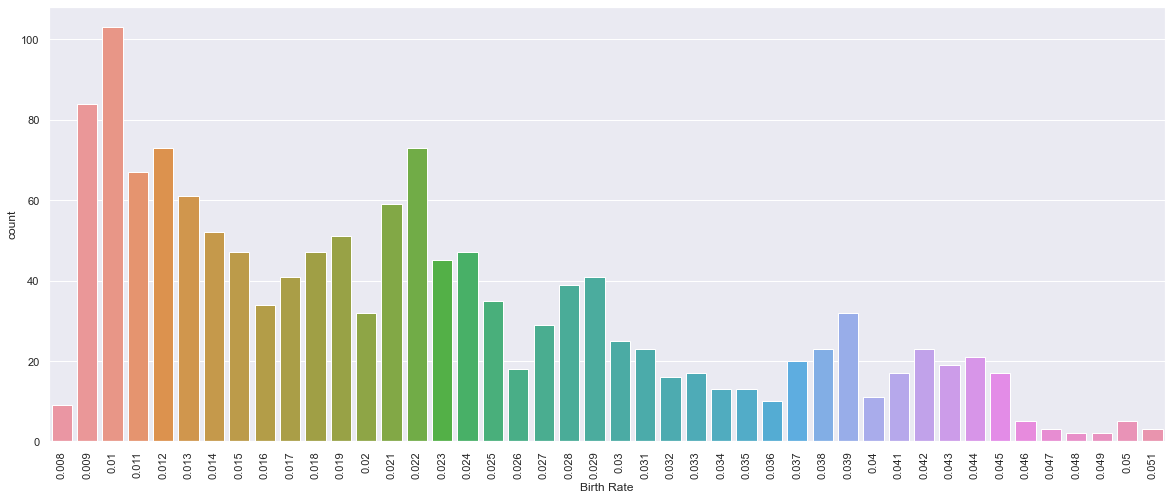

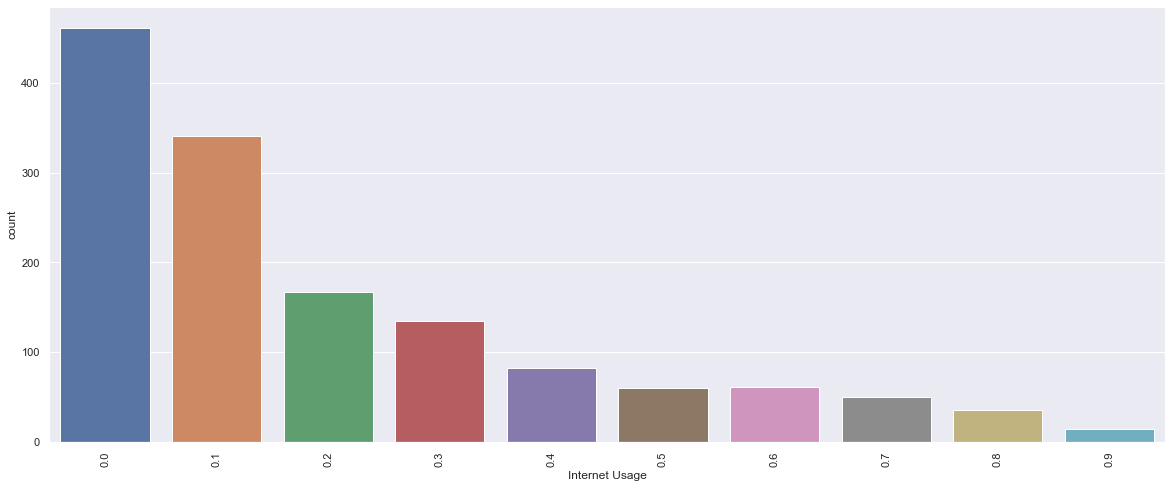

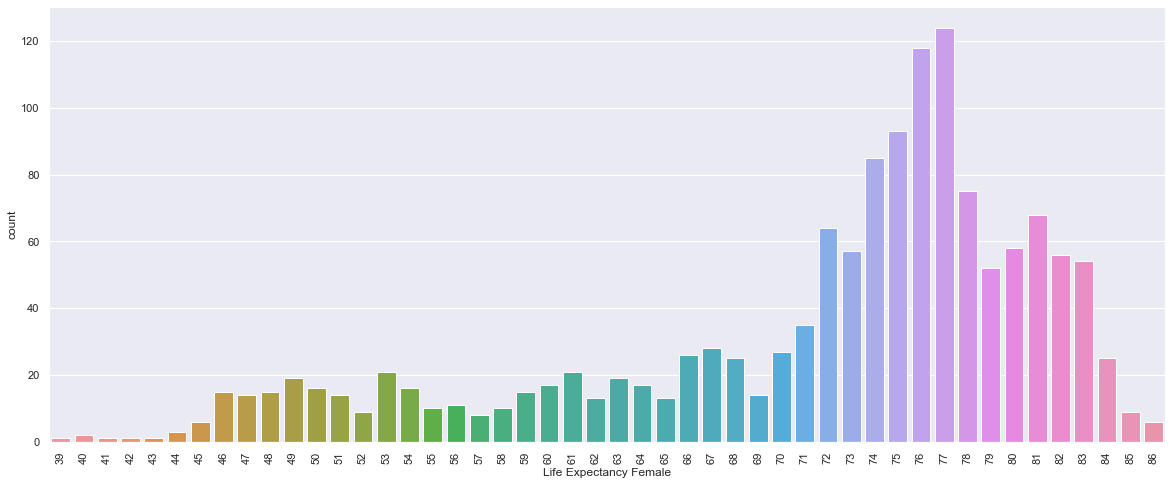

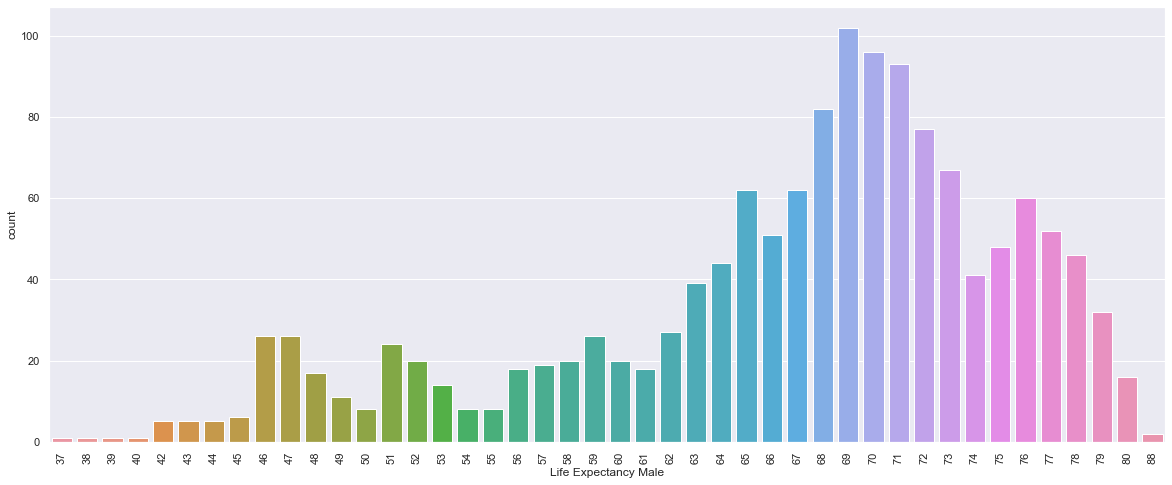

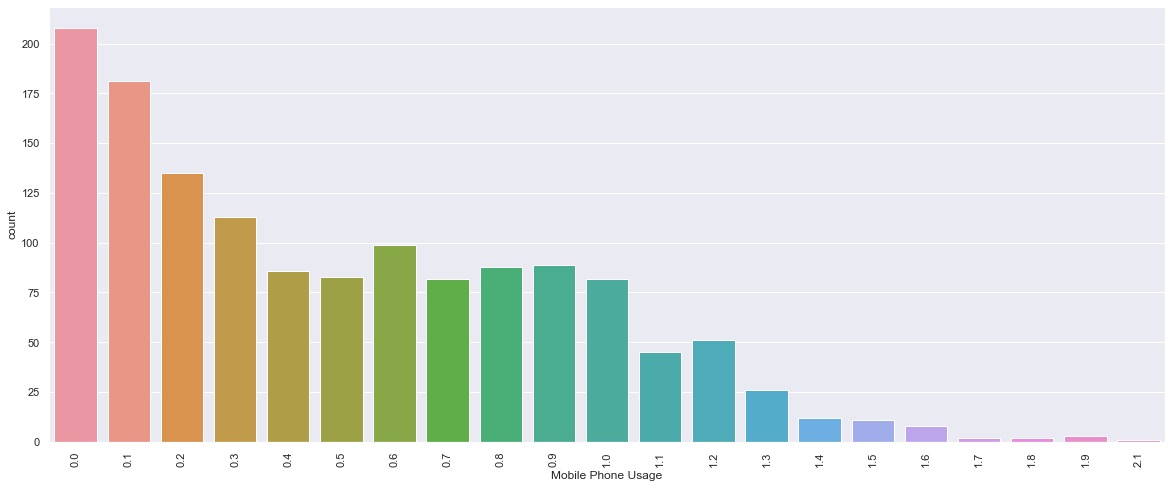

In [202]:
features = ['Birth Rate','Internet Usage', 'Life Expectancy Female', 'Life Expectancy Male','Mobile Phone Usage']

for i in features:
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=90)
    plt.show()

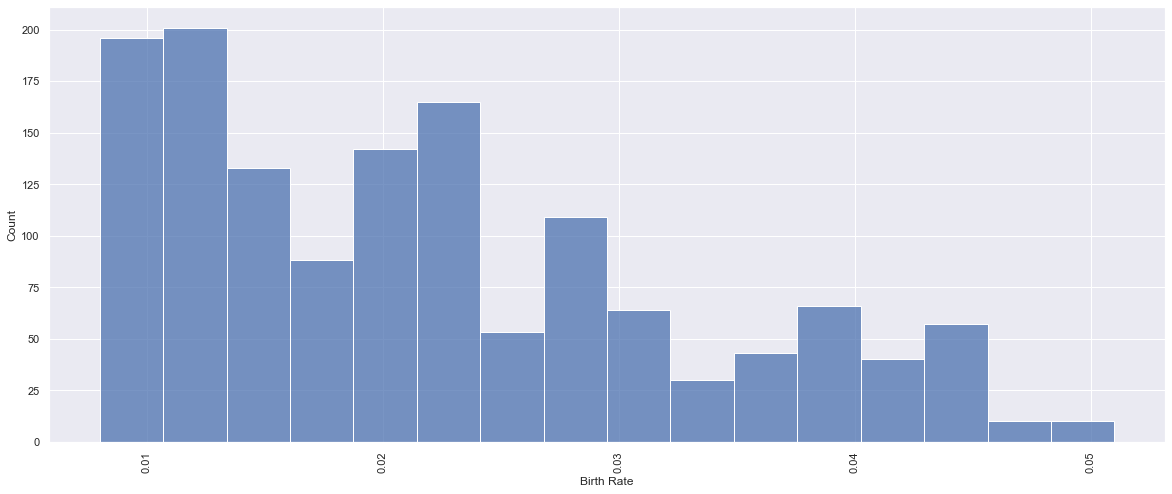

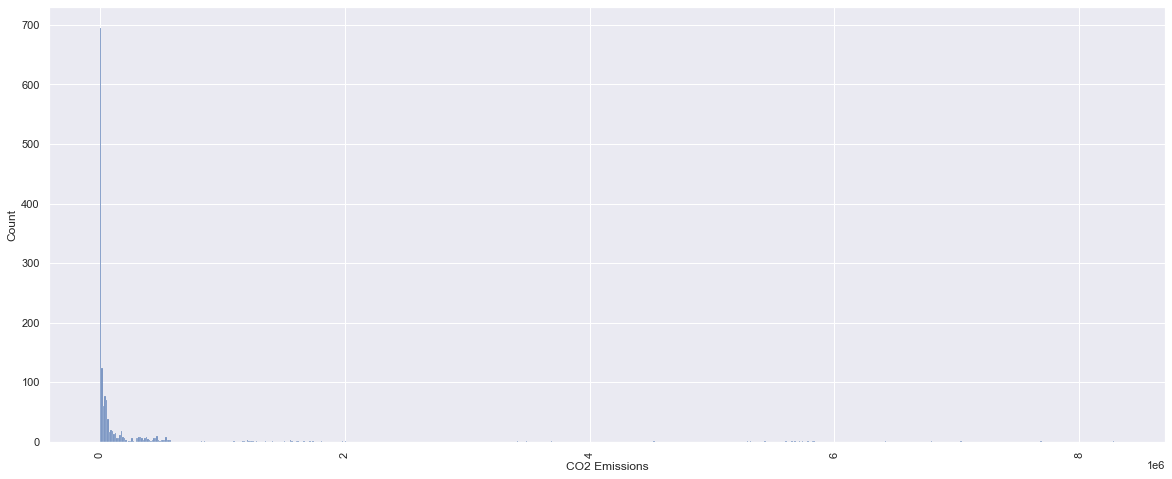

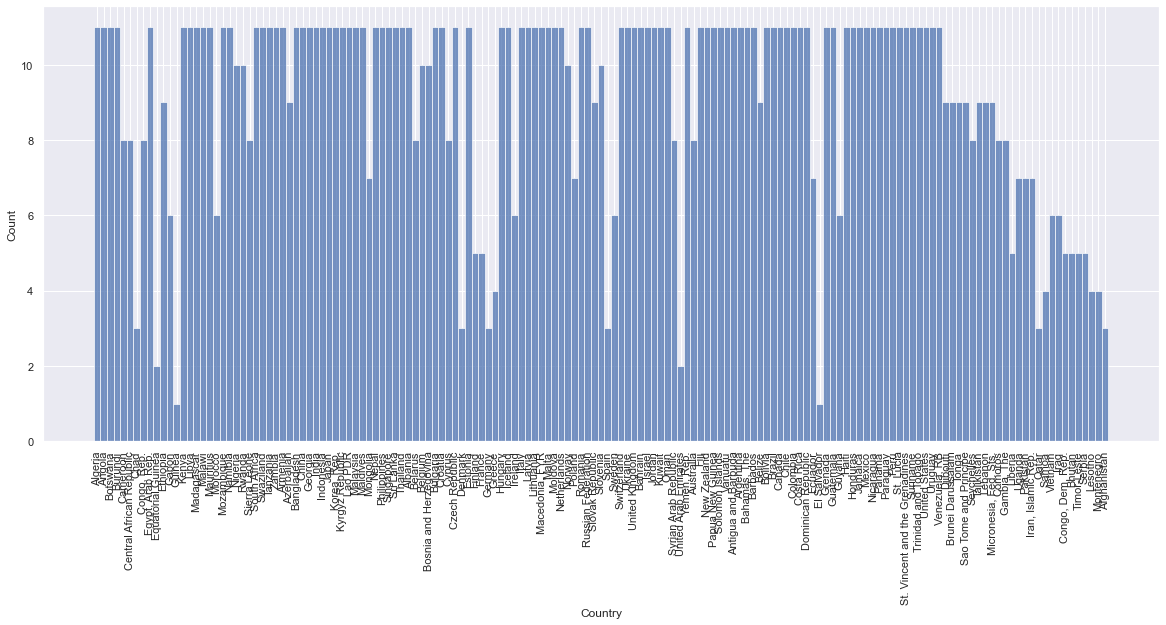

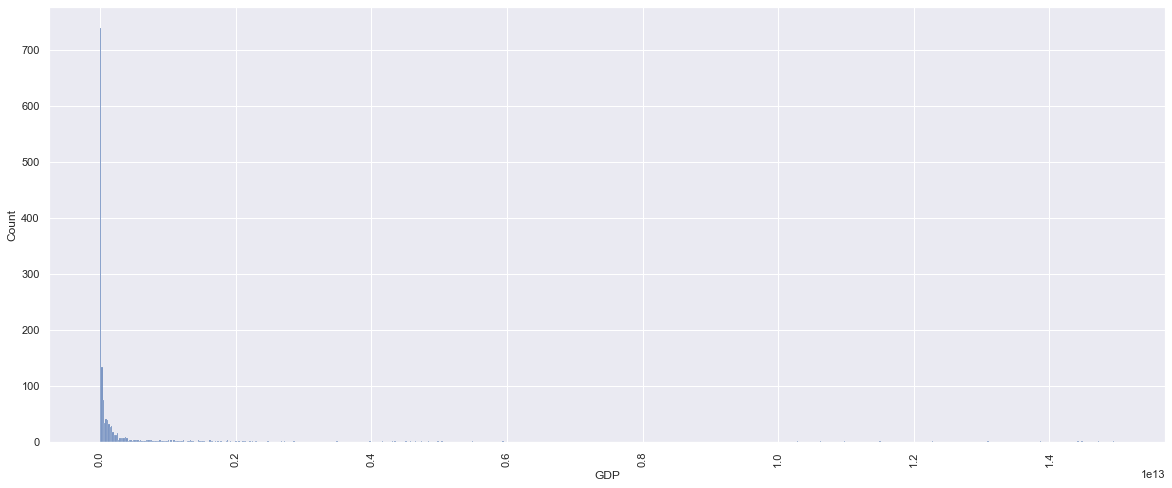

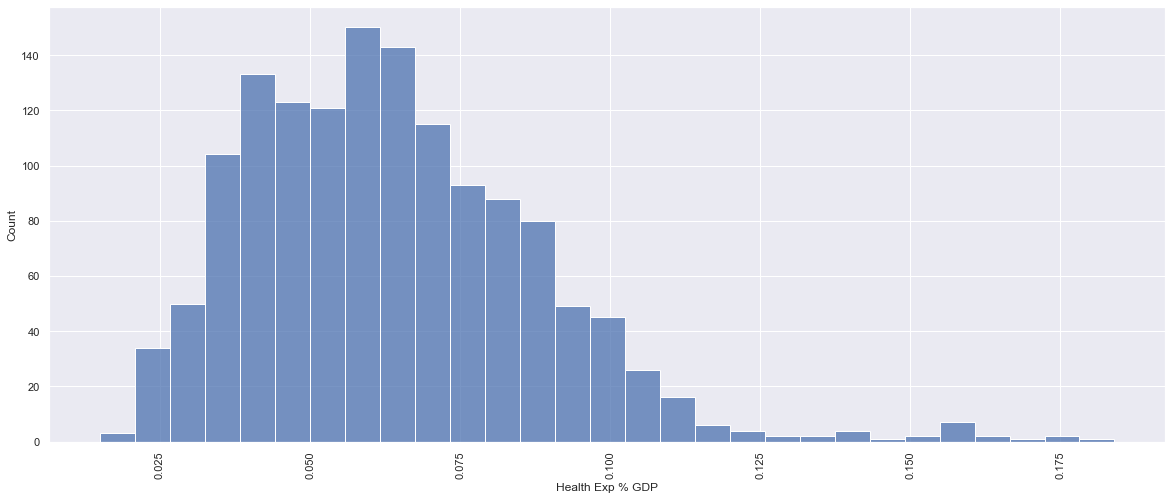

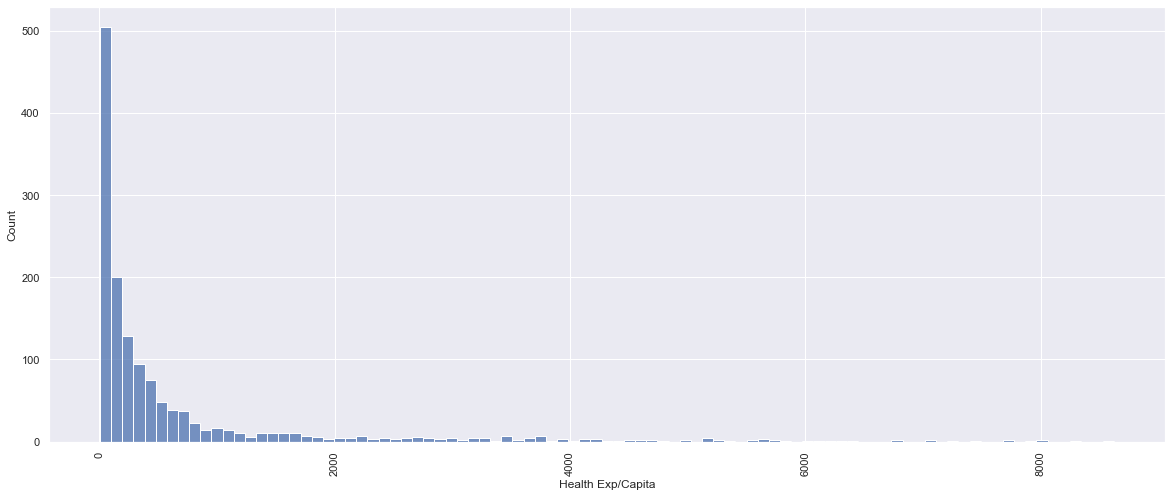

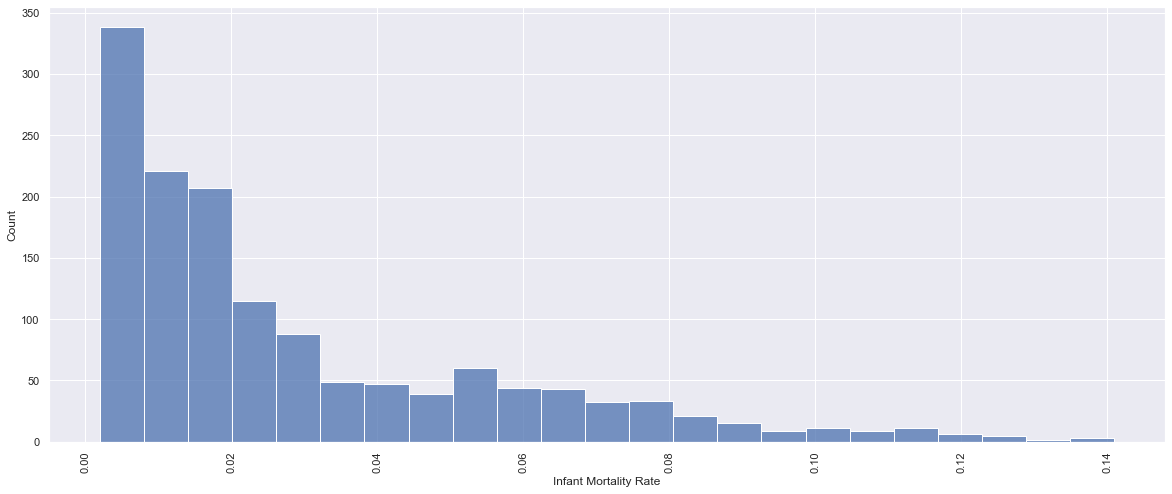

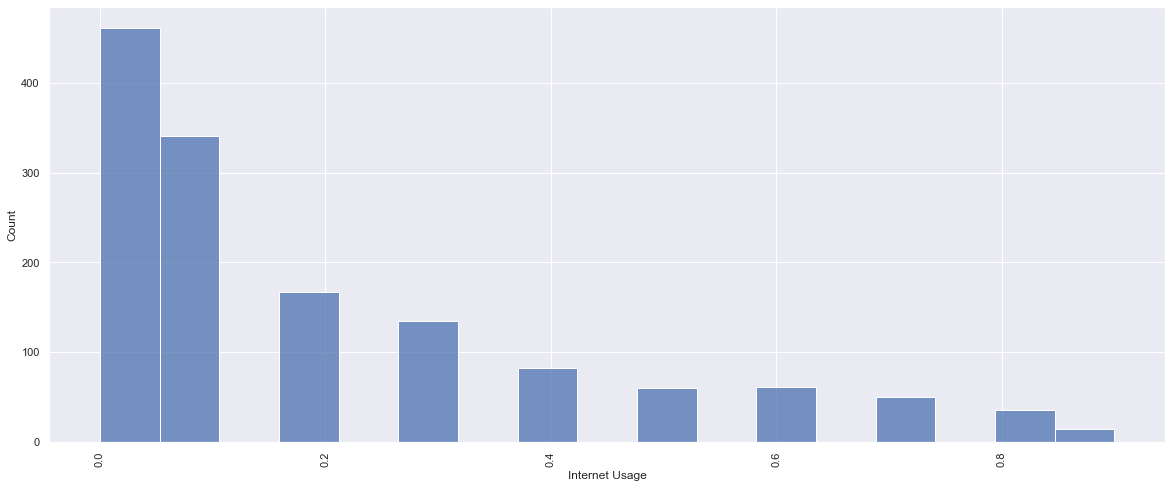

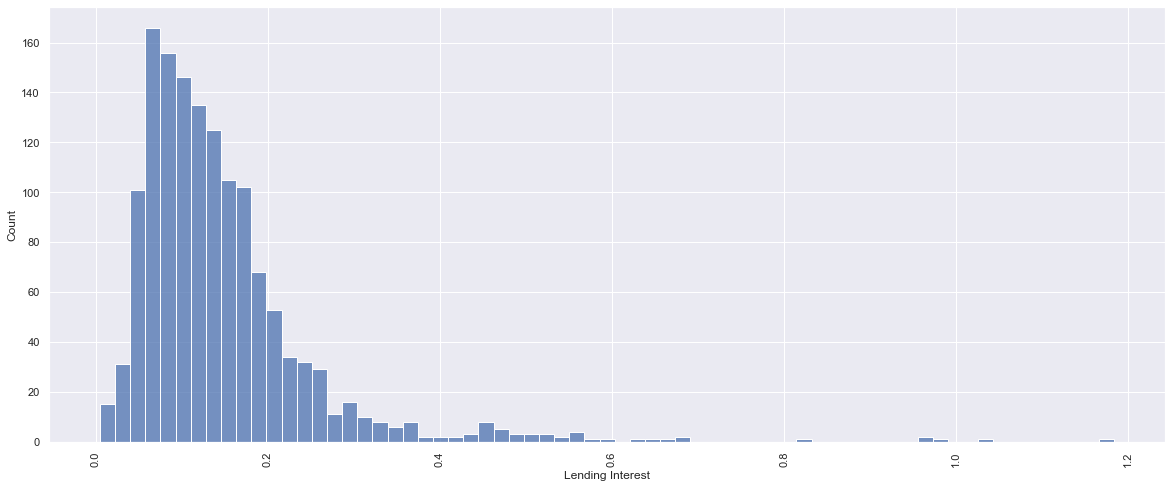

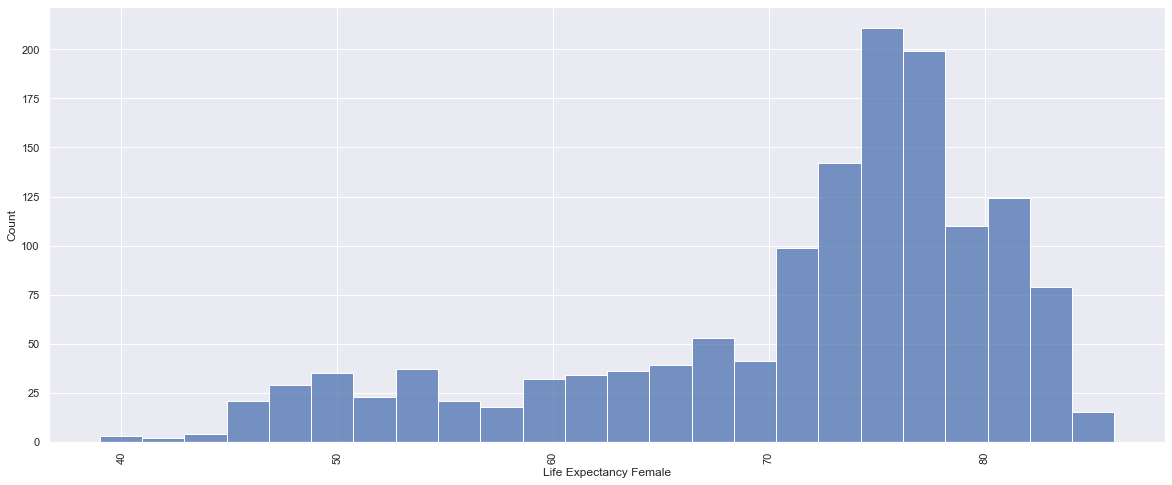

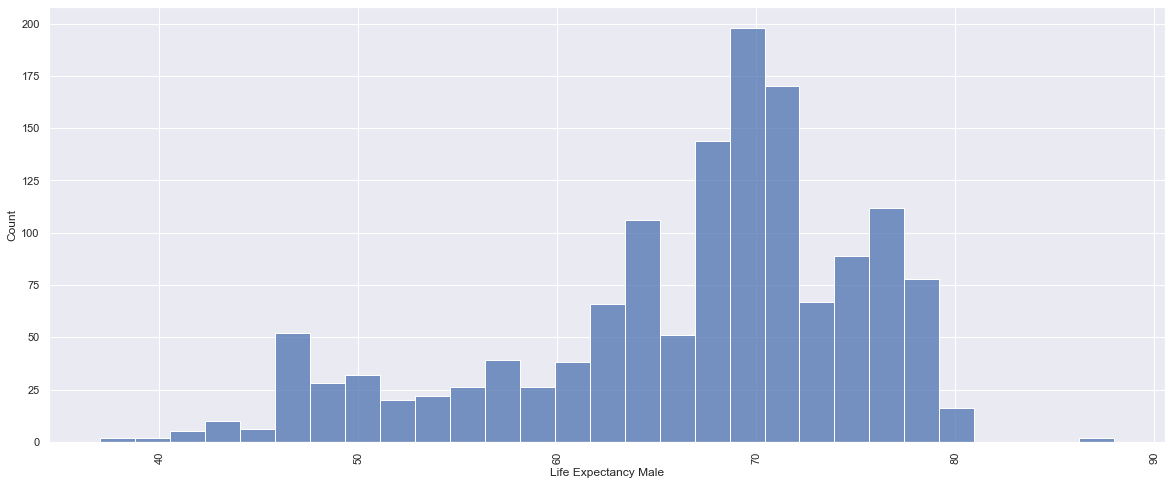

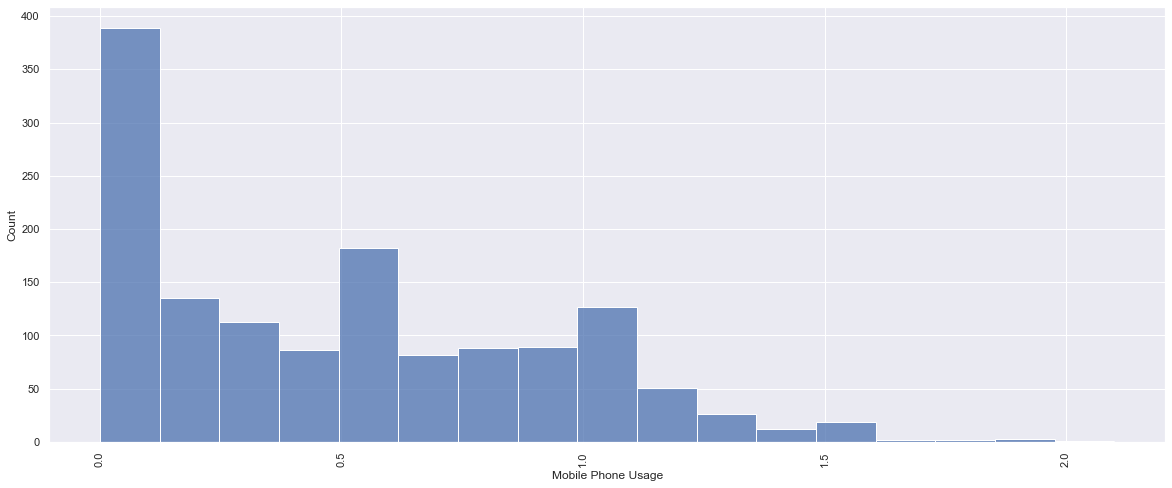

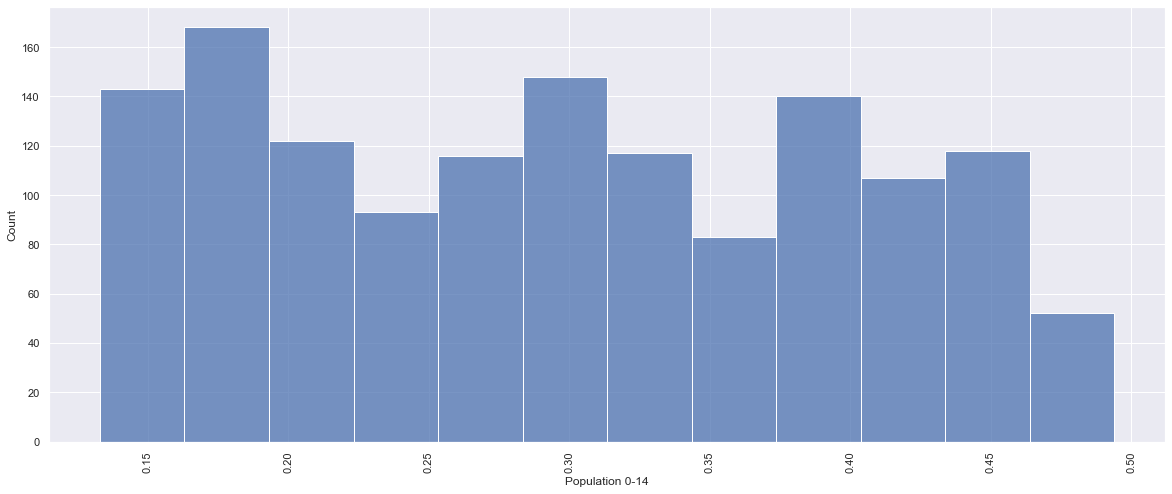

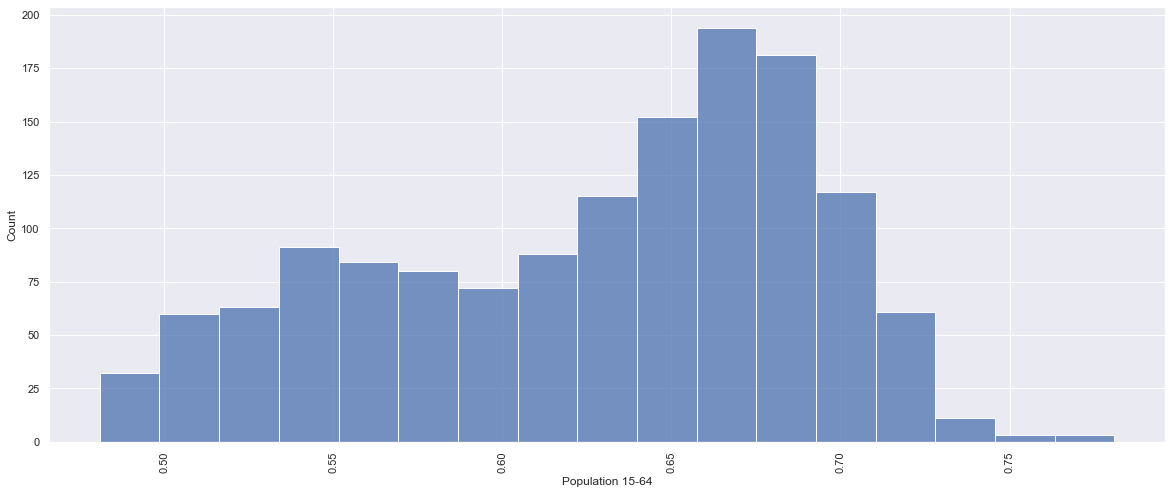

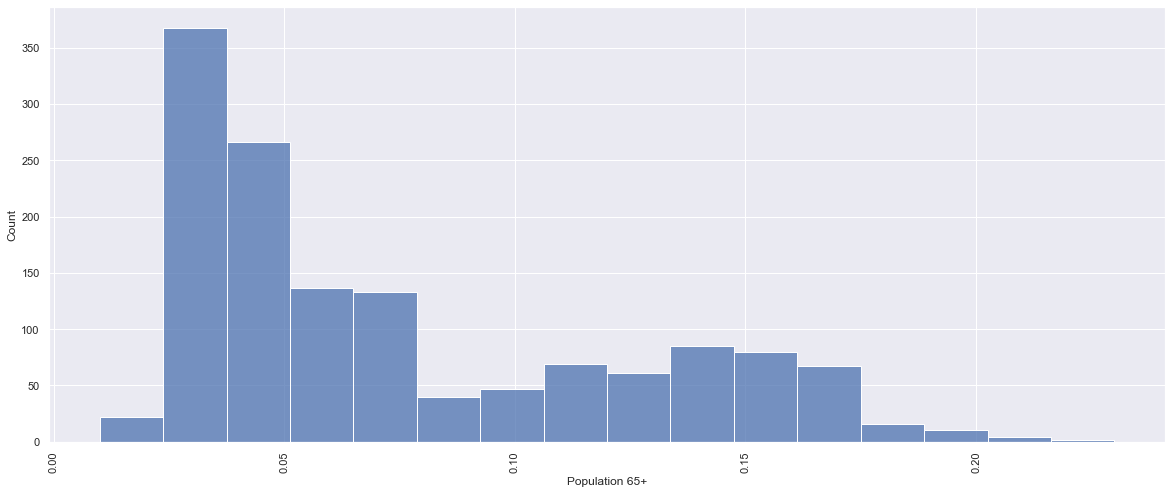

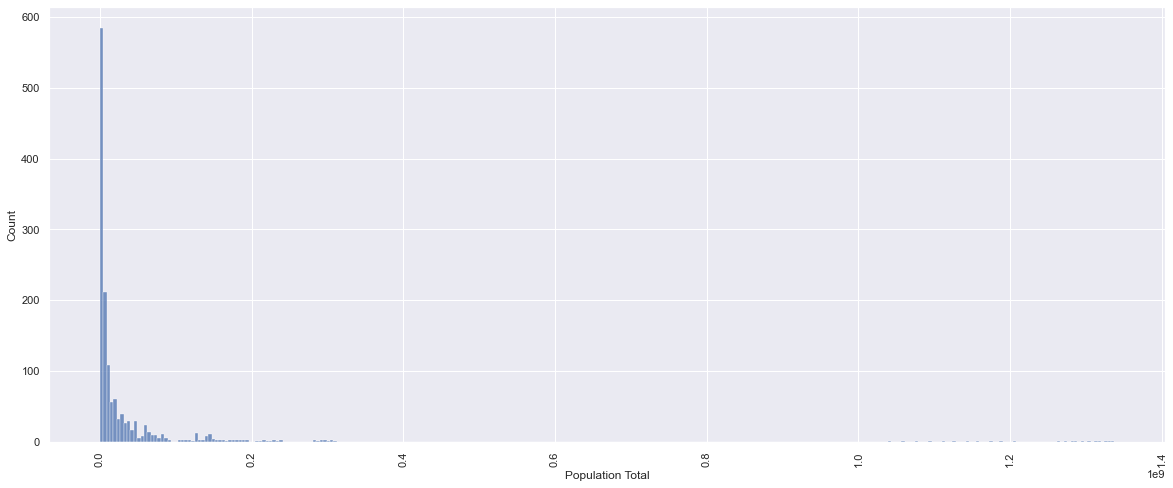

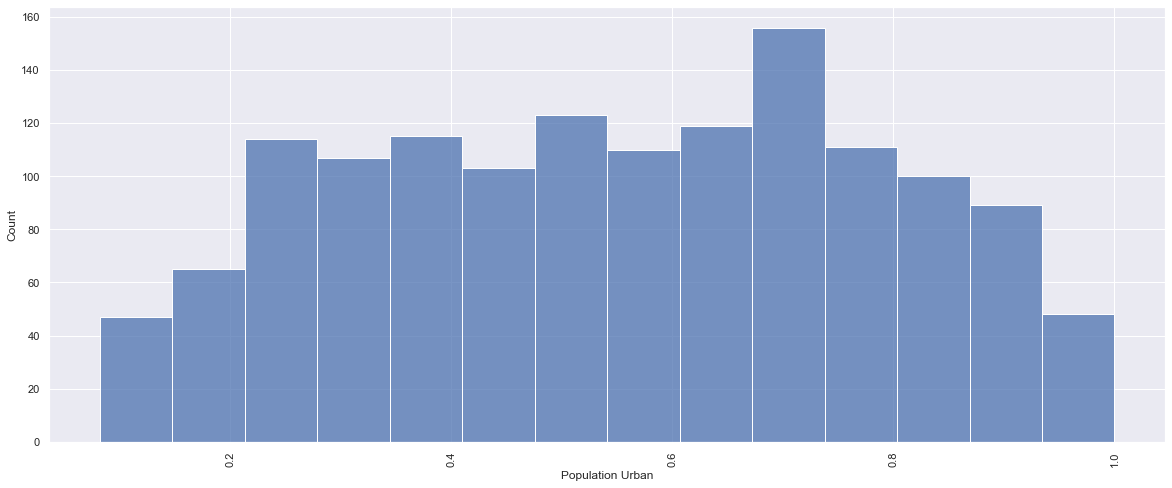

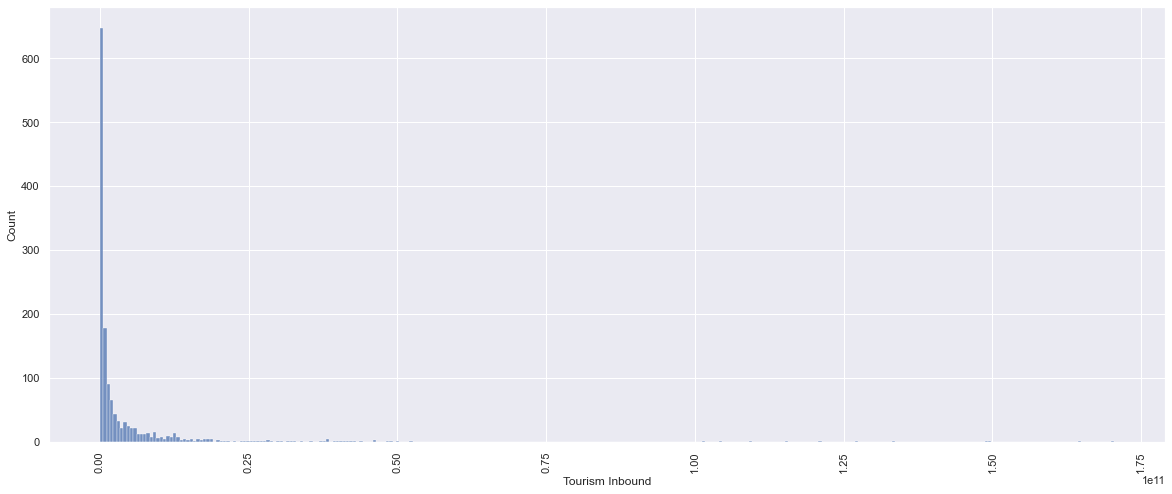

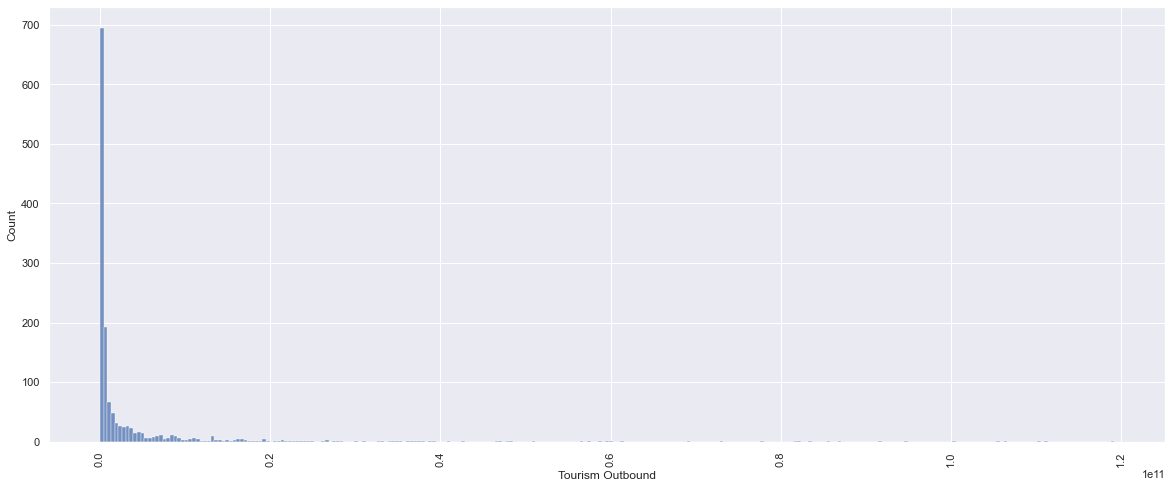

In [203]:
features = ['Birth Rate', 'CO2 Emissions', 'Country', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage',
       'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound']

for i in features:
    sns.histplot(x=i,data=df)
    plt.xticks(rotation=90)
    plt.show()

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 2286
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              1407 non-null   float64
 1   CO2 Emissions           1407 non-null   float64
 2   Country                 1407 non-null   object 
 3   GDP                     1407 non-null   int64  
 4   Health Exp % GDP        1407 non-null   float64
 5   Health Exp/Capita       1407 non-null   int64  
 6   Infant Mortality Rate   1407 non-null   float64
 7   Internet Usage          1407 non-null   float64
 8   Lending Interest        1407 non-null   float64
 9   Life Expectancy Female  1407 non-null   int64  
 10  Life Expectancy Male    1407 non-null   int64  
 11  Mobile Phone Usage      1407 non-null   float64
 12  Population 0-14         1407 non-null   float64
 13  Population 15-64        1407 non-null   float64
 14  Population 65+          1407 non-null   

# Clustering

In [205]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [206]:
# standardizing data

scalar = StandardScaler() 
df1 = df.drop(["Country"],axis=1)
std_df = scalar.fit_transform(df1)

### Hierarchial Clustering

In [207]:
from sklearn.cluster import AgglomerativeClustering

for i in range(3,10):
    for j in ["ward", "complete", "average", "single"]:
        cluster = AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage=j).fit_predict(std_df)
        score = silhouette_score(pca_df,cluster)
        print("Cluster -->",i,"| Linkage -->",j,"| Best Score -->",score)

Cluster --> 3 | Linkage --> ward | Best Score --> 0.36462536438473675
Cluster --> 3 | Linkage --> complete | Best Score --> 0.6770600915364544
Cluster --> 3 | Linkage --> average | Best Score --> 0.6079671362555275
Cluster --> 3 | Linkage --> single | Best Score --> 0.6079671362555275
Cluster --> 4 | Linkage --> ward | Best Score --> 0.38112246656347537
Cluster --> 4 | Linkage --> complete | Best Score --> 0.2428699273867028
Cluster --> 4 | Linkage --> average | Best Score --> 0.39613102721821747
Cluster --> 4 | Linkage --> single | Best Score --> -0.07596452669152598
Cluster --> 5 | Linkage --> ward | Best Score --> 0.4032135514801884
Cluster --> 5 | Linkage --> complete | Best Score --> 0.37942752271027863
Cluster --> 5 | Linkage --> average | Best Score --> -0.11188093047816719
Cluster --> 5 | Linkage --> single | Best Score --> -0.09484628394315675
Cluster --> 6 | Linkage --> ward | Best Score --> 0.3517012641686728
Cluster --> 6 | Linkage --> complete | Best Score --> 0.0374635243

In [208]:
print("Cluster --> 3 | Linkage --> complete | Best Score --> 0.628478384357843")

Cluster --> 3 | Linkage --> complete | Best Score --> 0.628478384357843


### Kmeans Clustering

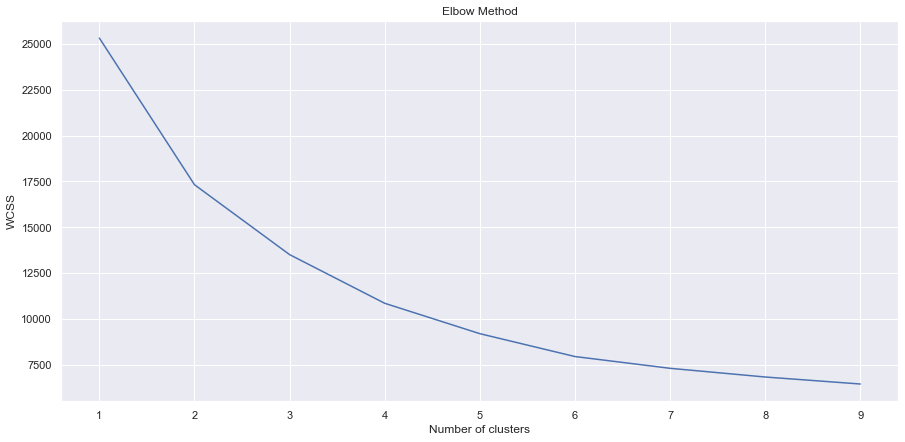

In [209]:
from sklearn.cluster import KMeans

WCSS = []
for i in range(1,10):
    cluster = KMeans(n_clusters=i,random_state=42).fit(std_df)
    WCSS.append(cluster.inertia_)
    
plt.figure(figsize=(15,7))
plt.plot(np.arange(1,10),WCSS)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [210]:
WCSS

[25326.0,
 17320.73300751295,
 13504.257333284238,
 10847.525042136616,
 9188.609756884132,
 7940.246686431589,
 7297.849751850823,
 6822.973326544514,
 6440.715011231803]

In [211]:
for i in range(3,10):
    cluster = KMeans(n_clusters=i,random_state=42).fit_predict(std_df)
    score = silhouette_score(std_df,cluster)
    print("Cluster -->",i,"| Best Score -->",score)

Cluster --> 3 | Best Score --> 0.33043865553672924
Cluster --> 4 | Best Score --> 0.2778670822208343
Cluster --> 5 | Best Score --> 0.29117649591723727
Cluster --> 6 | Best Score --> 0.2627924778124983
Cluster --> 7 | Best Score --> 0.21068271480652753
Cluster --> 8 | Best Score --> 0.22152816061864883
Cluster --> 9 | Best Score --> 0.19814884696152996


In [212]:
print("Cluster --> 3 | Best Score --> 0.33043865553672924")

Cluster --> 3 | Best Score --> 0.33043865553672924


### Dbscan Clustering

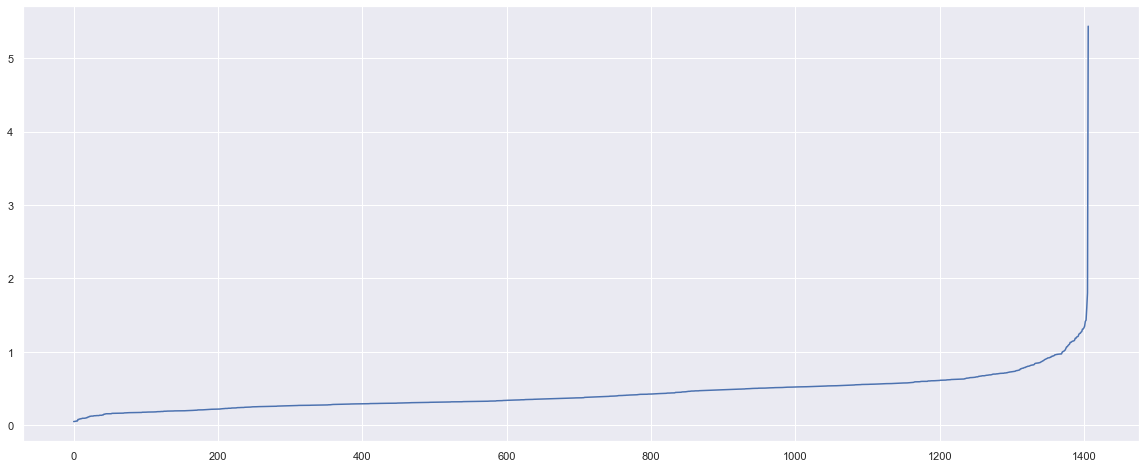

In [213]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=21).fit(std_df)
distance,indices = nn.kneighbors(std_df)

distance = np.sort(distance,axis=0)

distance = distance[:,1]

plt.plot(distance)

In [214]:
epsilon = [1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.5,3.75,4]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


for i in epsilon:
    for j in min_samples:

        cluster = DBSCAN(eps=i,min_samples=j).fit_predict(std_df)
        score = silhouette_score(std_df,cluster)
        print("Epsilon -->",i,"| mpts -->",mpts,"| Best Score -->",score)



Epsilon --> 1 | mpts --> 15 | Best Score --> 0.006989085570730713
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.03859799790650483
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.07994643982559184
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.14200060898030833
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.19178604365560806
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.23016950143587497
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.2521661142584207
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.2894230731861802
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.327149321725277
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.3400050847410901
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.36435735886616083
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.3760637604266947
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.37416375141414665
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.33807266255054264
Epsilon --> 1 | mpts --> 15 | Best Score --> -0.32725329750551657
Epsilon --> 1 | 

Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.25508407862032884
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.25092891168823284
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.24924078486283507
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.3248400377587524
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.3245247539365069
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.32486768334745625
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.36591278561740576
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.5139828009337485
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.5139828009337485
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.5139828009337485
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.49778825544799343
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.49778825544799343
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.49778825544799343
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.49646615457750587
Epsilon --> 2.5 | mpts --> 15 | Best Score --> 0.49646615457750587


In [215]:
epsilon = [1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.5,3.75,4]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]

score = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        dbscan = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True
        labels = dbscan.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = silhouette_score(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        score.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 3.5 
min_sample= 15 
number of clusters= 1 
average silhouette score= 0.6306


#### From above experiments we can observe that DBSCAN giving better silhouette score compare to other two methods.

In [216]:
cluster = DBSCAN(eps=3.5,min_samples=15).fit(std_df)
dff = pd.DataFrame()
dff["id"] = cluster.labels_
dff["id"].value_counts()

 0    1373
-1      34
Name: id, dtype: int64

#### DBSCAN clustering is giving us only 2 cluters and one of them is noise. Therefore we will check other two clustering techniques.

In [217]:
# Hierarchial Clustering


cluster = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete").fit(pca_df)
dff["id"] = cluster.labels_
dff["id"].value_counts()

0    1385
1      11
2      11
Name: id, dtype: int64

In [218]:
# Kmeans Clustering



cluster = KMeans(n_clusters=3,random_state=42).fit(pca_df)
dff["id"] = cluster.labels_
dff["id"].value_counts()

1    781
0    608
2     18
Name: id, dtype: int64

#### Kmeans is givng proper distribution of data in 3 clusters. Therefore we will finalize Kmeans clustering method for our purpose.

### PCA

[48. 67. 76. 81. 85. 89. 92. 94. 96. 97. 98. 99. 99. 99. 99. 99. 99. 99.]


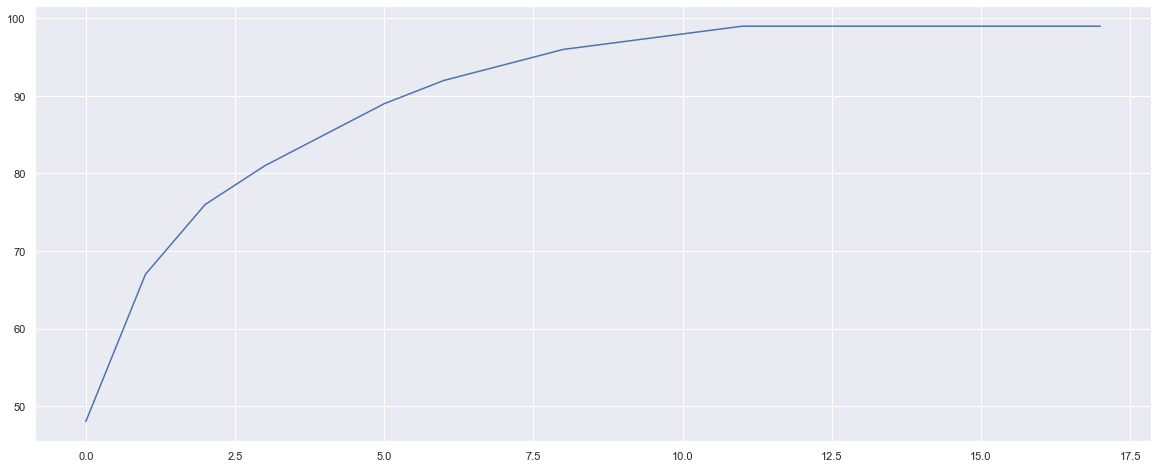

In [219]:
# Using PCA to improve performance of KMEANS.


from sklearn.decomposition import PCA
pca = PCA()
pcaf = pca.fit_transform(std_df)

exp = pca.explained_variance_ratio_
cumulative = np.cumsum(np.round(exp,2)*100)
print(cumulative)
plt.plot(cumulative)
plt.show()

In [222]:
pca = PCA(n_components=3)
pca_df = pca.fit_transform(std_df)

for i in range(3,10):
    cluster = KMeans(n_clusters=i,random_state=42).fit_predict(pca_df)
    score = silhouette_score(pca_df,cluster)
    print("Cluster -->",i,"| Best Score -->",score)

Cluster --> 3 | Best Score --> 0.4763241362708021
Cluster --> 4 | Best Score --> 0.4434354775536657
Cluster --> 5 | Best Score --> 0.4601149931162728
Cluster --> 6 | Best Score --> 0.4482598153031158
Cluster --> 7 | Best Score --> 0.4134536531862521
Cluster --> 8 | Best Score --> 0.37760890510236544
Cluster --> 9 | Best Score --> 0.3795869442931768


In [223]:
print("Cluster --> 3 | Best Score --> 0.47632413031470067")

Cluster --> 3 | Best Score --> 0.47632413031470067


#### Adding new feature of cluster numbers to our original dataframe.

In [225]:
final_cluster = KMeans(n_clusters=3,random_state=42).fit(pca_df)
df["Cluster Category"] = final_cluster.labels_

#### Replacing Cluster Numbers with Cluster Names.

In [226]:
df["Cluster Category"].loc[df["Cluster Category"]== 0] = "Cluster 1"
df["Cluster Category"].loc[df["Cluster Category"]== 1] = "Cluster 2"
df["Cluster Category"].loc[df["Cluster Category"]== 2] = "Cluster 3"

In [227]:
df.head()

,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Cluster Category
0,0.020,87931.0,Algeria,54790058957,0.035,60,0.034,0.0,0.100,71,67,0.0,0.342,0.619,0.039,31719449,0.599,102000000,193000000,Cluster 1
1,0.050,9542.0,Angola,9129594819,0.034,22,0.128,0.0,1.032,47,44,0.0,0.476,0.499,0.025,13924930,0.324,34000000,146000000,Cluster 1
3,0.027,4276.0,Botswana,5788311645,0.047,152,0.054,0.0,0.155,52,49,0.1,0.383,0.587,0.029,1755375,0.532,227000000,209000000,Cluster 1
5,0.042,301.0,Burundi,870486066,0.063,7,0.092,0.0,0.158,49,47,0.0,0.490,0.481,0.029,6674286,0.082,1400000,14000000,Cluster 1
6,0.041,3432.0,Cameroon,9287367569,0.044,26,0.093,0.0,0.220,53,51,0.0,0.453,0.513,0.034,15927713,0.455,132000000,241000000,Cluster 1


#### Exporting dataframe to csv file.

In [228]:
df.to_csv('WDM.csv',index=False)

In [229]:
pd.read_csv('WDM.csv')

,Birth Rate,CO2 Emissions,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Cluster Category
0,0.020,87931.0,Algeria,54790058957,0.035,60,0.034,0.0,0.100,71,67,0.0,0.342,0.619,0.039,31719449,0.599,102000000,193000000,Cluster 1
1,0.050,9542.0,Angola,9129594819,0.034,22,0.128,0.0,1.032,47,44,0.0,0.476,0.499,0.025,13924930,0.324,34000000,146000000,Cluster 1
2,0.027,4276.0,Botswana,5788311645,0.047,152,0.054,0.0,0.155,52,49,0.1,0.383,0.587,0.029,1755375,0.532,227000000,209000000,Cluster 1
3,0.042,301.0,Burundi,870486066,0.063,7,0.092,0.0,0.158,49,47,0.0,0.490,0.481,0.029,6674286,0.082,1400000,14000000,Cluster 1
4,0.041,3432.0,Cameroon,9287367569,0.044,26,0.093,0.0,0.220,53,51,0.0,0.453,0.513,0.034,15927713,0.455,132000000,241000000,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0.018,2384.0,Suriname,4368033802,0.058,483,0.022,0.3,0.116,74,67,1.0,0.286,0.649,0.064,524960,0.663,69000000,41000000,Cluster 2
1403,0.015,50682.0,Trinidad and Tobago,20758191858,0.052,805,0.021,0.5,0.093,73,66,1.4,0.207,0.710,0.083,1328095,0.091,630000000,97000000,Cluster 2
1404,0.013,5433057.0,United States,14958300000000,0.177,8254,0.006,0.7,0.033,81,76,0.9,0.198,0.671,0.131,309326295,0.808,164606000000,110313000000,Cluster 3
1405,0.015,6645.0,Uruguay,38881102075,0.087,998,0.011,0.5,0.103,80,73,1.3,0.225,0.636,0.139,3371982,0.944,1669000000,549000000,Cluster 2


# 